In [30]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [31]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
from collections import OrderedDict
%matplotlib inline

plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

# @param: y: gdp_g, quarterly
#         x: a macro indicator, monthly
# Return: dataframe
def get_reg_df(x, y = "gdp_g"):
    y_q_lag1 = df[y].shift(3) 
    if x == "gdp_g":
        dic_reg = {'y': df[y], 'y_q_lag1': y_q_lag1}        
    else:     
        x_m_lag1 = df[x].shift(1)
        x_m_lag2 = df[x].shift(2)
        x_m_lag3 = df[x].shift(3)    
        dic_reg = {'y': df[y], 'y_q_lag1': y_q_lag1, 'x_m_lag1': x_m_lag1, 
                               'x_m_lag2': x_m_lag2, 'x_m_lag3': x_m_lag3}
    df_reg = pd.DataFrame(dic_reg)
    df_reg.dropna(inplace=True)
    return df_reg

# @param: dataframe for regression
# Return: regression result
def reg(df): 
    y = df['y']
    x_names = df.columns.values.tolist()
    x_names.remove('y')
    X = df[x_names]
    X = sm.add_constant(X) 
    return sm.OLS(y, X).fit() 

# @param: regression result
# Return: float, rmse
def get_rmse(model): 
    return math.sqrt(model.mse_resid)

# @param: regression result
# Return: float, radj
def get_radj(model): 
    return model.rsquared_adj

# @param: dictionary of regression results
# Return: histogram
def plot_attr(dic_attr, reverse=True): 
    if reverse:
        dic_attr_ordered = OrderedDict(sorted(dic_attr.items(), 
                                              key = lambda x: x[1], reverse = True))
        plt.bar(dic_attr_ordered.keys(), dic_attr_ordered.values(), width = 0.4 )
    else:
        dic_attr_ordered = OrderedDict(sorted(dic_attr.items(), 
                                              key = lambda x: x[1], reverse = False))
        plt.bar(dic_attr_ordered.keys(), dic_attr_ordered.values(), width = 0.4 )

## 1. Variables

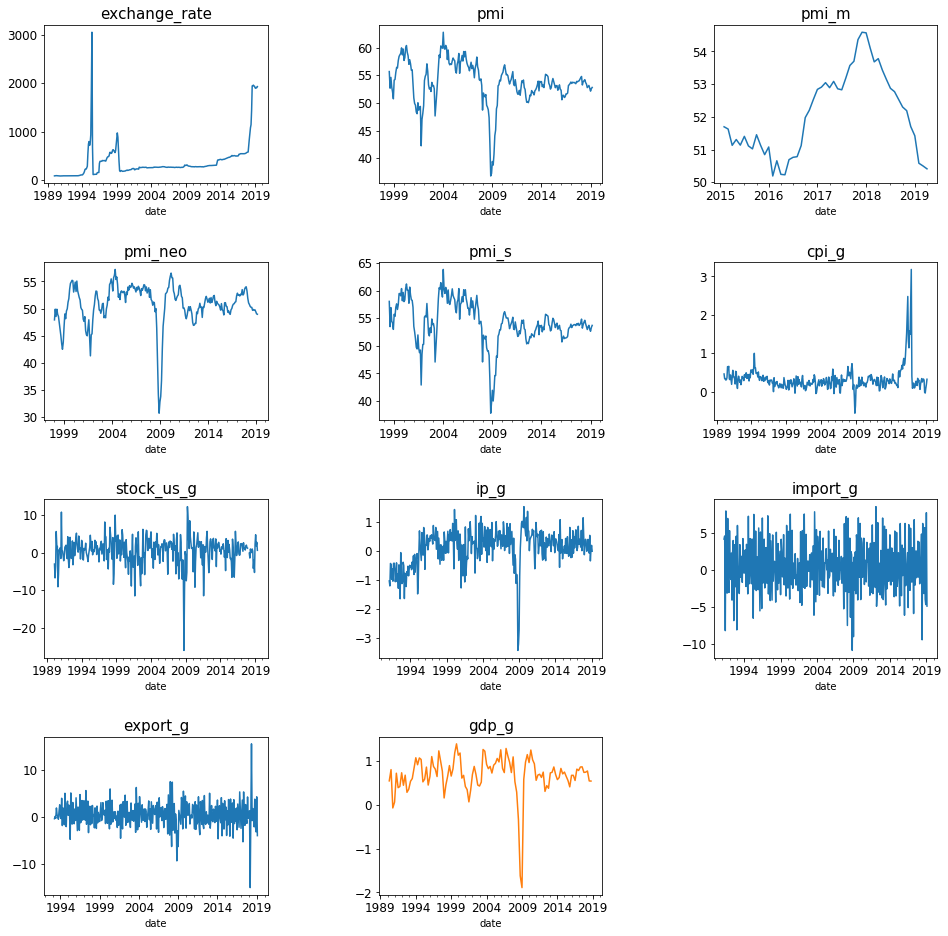

In [32]:
date = "20190503"
projFolder = "R:/Shi/Project_Nowcasting/output/"

path_df = projFolder + date + "/" + date + "_data.xlsx"
df = pd.read_excel(path_df, index_col = 0) 

fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, column in zip(range(1, 12), df):
    ax = fig.add_subplot(4, 3, i)
    df[column].plot()
    if column == 'gdp_g':
       df['gdp_g'][~np.isnan(df['gdp_g'])].plot()
    plt.title(column, fontsize=15)

## 2. Equation

\begin{equation*}
gdp_q = \beta_0 + \beta_1 gdp_{q-1} + \epsilon_i
\end{equation*}

\begin{equation*}
gdp_q = \beta_0 + \beta_1 gdp_{q-1} + \beta_2 I_{m-1} + \beta_3 I_{m-2} + \beta_4 I_{m-3} + \epsilon_i
\end{equation*}

## 3. RMSE and Adj. R-squared

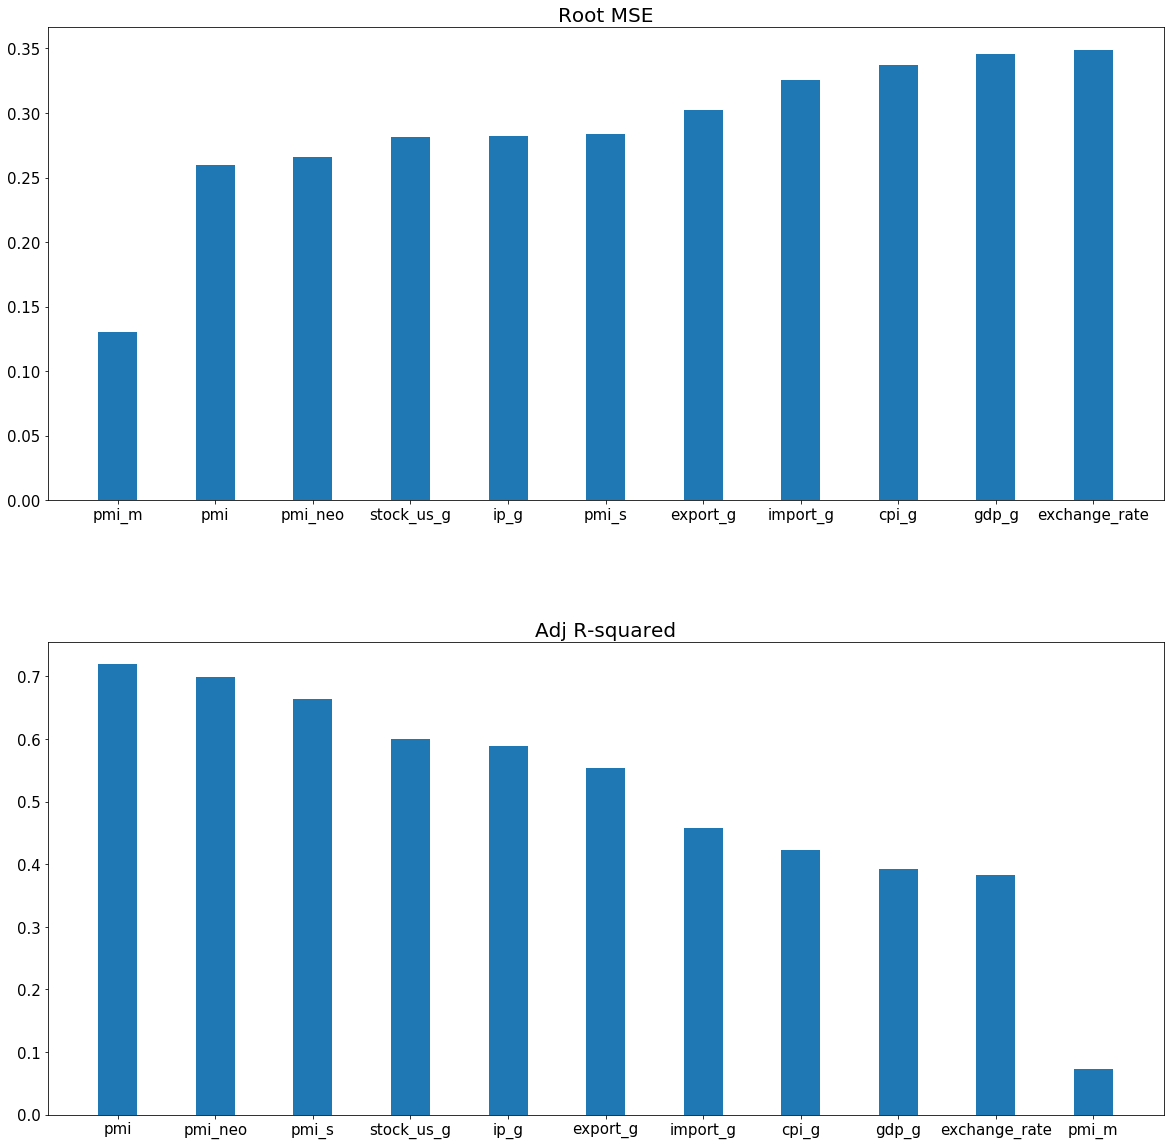

In [34]:
dic_rmse = {}
dic_radj = {}

for colomn in df:
    df_reg = get_reg_df(colomn)
    model = reg(df_reg)
    rmse = get_rmse(model)
    radj = get_radj(model)
    dic_rmse.update({colomn: rmse})
    dic_radj.update({colomn: radj})

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.3, wspace=0.3)    
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15 

fig.add_subplot(2, 1, 1)
plot_attr(dic_rmse, reverse=False)
plt.title("Root MSE", fontsize=20)

fig.add_subplot(2, 1, 2)
plot_attr(dic_radj)
plt.title("Adj R-squared", fontsize=20);